### Marketing Research Assignment



```
2018100116 LIJIAXUE
2017105589 ZHANG MENG 
2017105591 ZHANGYUZHUO 
2012100249 SANGHYUK SON                       
```

> 
>- We used Python Libraries(Numpy, Pandas, Matplotlib, scipy) to explore the Data.
>- We wrote this document by using Jupyter Notebook, Typora, and Markdown. 
>- Due to the lack of spcae, many pre-processing processes have been omitted. You can see all raw codes in the link below. 
>[https://github.com/saanghyuk/deep_learning_2019_fall/tree/master/MarketingResearch](Github)


------
<u>Form the two hypotheses to the Data</u>

|    Data     | Hypothesis Question                                          |
| :---------: | ------------------------------------------------------------ |
| Credit Risk | Is the total savings(combined checking and savings account balance) of Population 2800? |
| Credit Risk | Does the total savings(combined checking and savings account balance) have a correlation with the number of months as a customer of the bank? |
|  Facebook   | Does the Hours online/week have a correlation with Friends?  |



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline



mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('Data_Sets.xlsx')

<h4>Explore the Data</h4>

There are 10 columns in this Data

In [67]:
data.head()

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
5,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low


***We have to divde Categorical and Numerical Data to deep dive into Data.***

In [19]:
cate_list = ['Loan Purpose','Gender', 'Marital Status', 'Housing', 'Job', 'Credit Risk']
num_list = ['Checking ', 'Savings', 'Months Customer','Months Employed',
           'Age', 'Years' ]

In [75]:
cate_data = data[cate_list]

In [76]:
num_data = data[num_list]
num_data = num_data.infer_objects()

**We want to see the approximate description of these two data**

In [79]:
cate_data.describe()

,Loan Purpose,Gender,Marital Status,Housing,Job,Credit Risk
count,425,425,425,425,425,425
unique,10,2,3,3,4,2
top,Small Appliance,M,Single,Own,Skilled,Low
freq,105,290,233,292,271,214


In [80]:
num_data.describe()

,Checking,Savings,Months Customer,Months Employed,Age,Years
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,1048.014118,1812.562353,22.896471,31.896471,34.397647,2.840000
std,3147.183472,3597.285020,12.267599,32.259321,11.045126,1.087146
min,0.000000,0.000000,5.000000,0.000000,18.000000,1.000000
25%,0.000000,228.000000,13.000000,6.000000,26.000000,2.000000
50%,0.000000,596.000000,19.000000,20.000000,32.000000,3.000000
75%,560.000000,921.000000,28.000000,47.000000,41.000000,4.000000
max,19812.000000,19811.000000,73.000000,119.000000,73.000000,4.000000


**I want to sum 'Checking' and 'Savings' as 'saving_total' column. **

In [81]:
frames = [cate_data, num_data]

In [82]:
data_2 = pd.concat(frames, axis=1, sort=False)

data_2['saving_total'] = data_2['Checking ']+data_2['Savings']

In [83]:
assign_data=data_2

*assign_data is the final version data after pre-processing*

In [84]:
#Data Check (5 rows)
assign_data.head()

,Loan Purpose,Gender,Marital Status,Housing,Job,Credit Risk,Checking,Savings,Months Customer,Months Employed,Age,Years,saving_total
1,Small Appliance,M,Single,Own,Unskilled,Low,0,739,13,12,23,3,739
2,Furniture,M,Divorced,Own,Skilled,High,0,1230,25,0,32,1,1230
3,New Car,M,Single,Own,Management,High,0,389,19,119,38,4,389
4,Furniture,M,Single,Own,Unskilled,High,638,347,13,14,36,2,985
5,Education,M,Single,Rent,Skilled,Low,963,4754,40,45,31,3,5717


In [33]:
num_data.describe()

,Checking,Savings,Months Customer,Months Employed,Age,Years
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,1048.014118,1812.562353,22.896471,31.896471,34.397647,2.840000
std,3147.183472,3597.285020,12.267599,32.259321,11.045126,1.087146
min,0.000000,0.000000,5.000000,0.000000,18.000000,1.000000
25%,0.000000,228.000000,13.000000,6.000000,26.000000,2.000000
50%,0.000000,596.000000,19.000000,20.000000,32.000000,3.000000
75%,560.000000,921.000000,28.000000,47.000000,41.000000,4.000000
max,19812.000000,19811.000000,73.000000,119.000000,73.000000,4.000000


<h3>1. Is the total savings(combined checking and savings account balance) of Population 2800?</h3>
<br>
One population Mean Testing about Savings
<br>
sample mean = 2860.576471<br>
sample std = 4826.993904


H0 : μ=2800
<br>
H1 : μ≠2800

In [86]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [96]:
savings_total = assign_data['saving_total']

In [97]:
print('The number of data : ',len(savings_total))
print('Sample Mean : ', savings_total.mean())
print('Sample Std : ', savings_total.std())

The number of data :  425
Sample Mean :  2860.576470588235
Sample Std :  4826.993904117601


In [98]:
sm.stats.ztest(savings_total, value=2800, alternative='two-sided')

(0.2587150425540816, 0.7958551123461524)

<h5>P-value pretty high here, and then we can't reject the H0

<h3>2. Does the total savings(combined checking and savings account balance) have a correlation with the number of months as a customer of the bank?</h3>

H0 : Two variables are not correlated.
<br>
H1 : Two variables are correlated.

In [92]:
from scipy.stats import pearsonr

In [93]:
savings=assign_data['saving_total']

In [94]:
months_customer=assign_data['Months Customer']

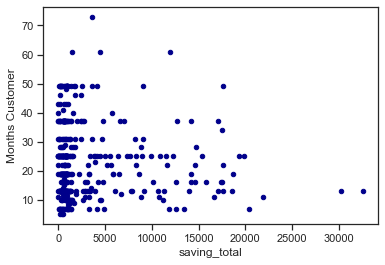

In [95]:
ax1 = assign_data.plot.scatter(x='saving_total', y='Months Customer', c='DarkBlue')

In [90]:
corr, p = pearsonr(savings, months_customer)

In [91]:
print(corr, p)

-0.06121000781711819 0.2079070784127837


correlation coefficient = -0.06121000781711819 <br>
p-value = 0.2079070784127837

In this pearsonr function, The null hypothesis is that the two variables are uncorrelated. The p-value is a number between zero and one that represents the probability that your data would have arisen if the null hypothesis were true.

<h5>corr is near 0, and P-value is really big. <br>
So, we cannot reject the null hypothesis(Uncorrelated)

<h3>Start pre-processing of Facebook Data</h3>

In [121]:
df = pd.read_excel('Data_Sets.xlsx', 'Facebook')

In [117]:
df1=df
df1.head()

,FACEBOOK SURVEY DATA,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Student,Gender,Hours online/week,Friends
2,1,female,4,150
3,2,female,10,400
4,5,female,9,260


In [118]:
df1 = df1.shift(-1)

In [123]:
new_col_names = pd.Series(df1.iloc[0])
df1.columns=list(new_col_names)

In [124]:
df1=df1.drop(df1.index[0])
df1=df1.drop(df1.index[33])
df1.head()

,Student,Gender,Hours online/week,Friends
1,1,female,4,150
2,2,female,10,400
3,5,female,9,260
4,6,female,5,70
5,7,female,7,90


In [109]:
df1=df1.drop(df1.index[0])
df1=df1.drop(df1.index[33])
df1.head()

,FACEBOOK SURVEY DATA,Unnamed: 1,Unnamed: 2,Unnamed: 3
1,1,female,4,150
2,2,female,10,400
3,5,female,9,260
4,6,female,5,70
5,7,female,7,90


In [126]:
df2= df1.infer_objects()

In [129]:
assign2_data = df2

*Final version data after preprocessing = assign2_data*

<h3>3. Does the Hours online/week have a correlation with Friends?</h3>


H0 : Two variables are not correlated.
<br>
H1 : Two variables are correlated.

In [130]:
hours=assign2_data['Hours online/week']
friends=assign2_data['Friends']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


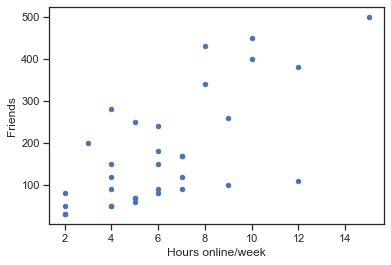

In [133]:
assgin2_data.plot.scatter(x='Hours online/week', y='Friends')

In [134]:
corr, p = pearsonr(hours, friends)

In [135]:
print(corr, p)

0.6918339795143523 8.224280934770067e-06


Correlation is about 0.7, and p-value is 8.22e-06(So Low). <br>
So, We can reject the null hypothesis(No-correlation)
This two data can be positively-correlated.